# Chapter 1 : 머신러닝 개요 실습

### 파이썬 개발환경 구축

In [1]:
#패키지 로드
import sklearn as sk
import scipy as sc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
a="hello python"
print(a)

hello python


# Chapter 2 : 선형회귀분석 1 실습

### 회귀모형 만들기 - 단순회귀모형

In [3]:
# 패키지 로드
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

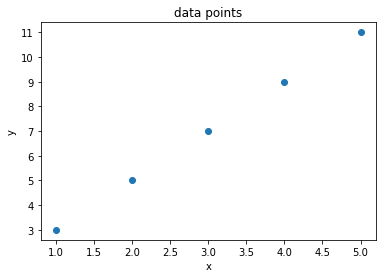

In [4]:
#선형회귀 할당
reg = LinearRegression()

#다른 샘플을 만들어 다양한 선형회귀식을 도출해볼 수 있다.
Xsample=[[1],[2],[3],[4],[5]]
Ysample=[[3],[5],[7],[9],[11]]

# 데이터 플랏으로 확인
plt.title('data points')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(Xsample,Ysample)

In [5]:
# 단순회귀모형 결과 확인
Model=reg.fit(Xsample,Ysample)
print("coef") # 계수
print(Model.coef_)
print("intercept") # 절편
print(Model.intercept_)

coef
[[2.]]
intercept
[1.]


In [6]:
#새로운 데이터 넣어서 예측
Model.predict([[15]])

array([[31.]])

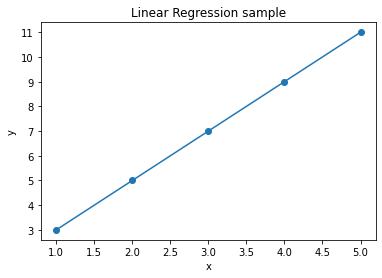

In [7]:
#회귀모형 visualiazation
plt.title('Linear Regression sample')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(Xsample,Ysample)
plt.plot(Xsample,Model.coef_*Xsample + Model.intercept_)

### 다중회귀분석

In [8]:
#패키지 로드
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_california_housing

No handles with labels found to put in legend.


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

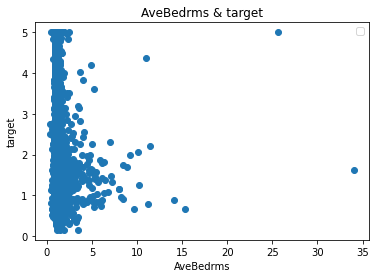

In [9]:
#데이터 로드
california = fetch_california_housing()
X=california.data
DF=pd.DataFrame(X,columns=california.feature_names)
Y=california.target
print(DF)

#i번째 feature와 타겟값 시각화하기
i=3
plt.title(california.feature_names[i]+' & ' + 'target')
plt.xlabel(california.feature_names[i])
plt.ylabel('target')
plt.scatter(DF[california.feature_names[i]],Y)
plt.legend()
plt.show()



In [10]:
#선형회귀식 할당
reg = LinearRegression()

#데이터 선형회귀식 적합
Model=reg.fit(X,Y)

#선형회귀 결과 확인
print("coef")
print(Model.coef_)
print("intercept")
print(Model.intercept_)



coef
[ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]
intercept
-36.94192020718434


No handles with labels found to put in legend.


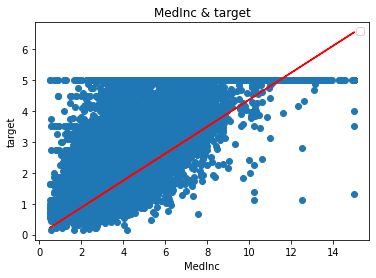

In [11]:
#학습결과 시각화
i=0
plt.title(california.feature_names[i]+' & ' + 'target')
plt.xlabel(california.feature_names[i])
plt.ylabel('target')
plt.scatter(DF[california.feature_names[i]],Y)
plt.plot(DF[california.feature_names[i]],Model.coef_[i]*DF[california.feature_names[i]],'r-')
plt.legend()
plt.show()

In [12]:
#각 변수들의 평균값
DF.mean()

#각 변수의 평균값을 토대로 예측했을 때의 결과값
Model.predict([DF.mean()]) #타겟값의 평균을 알 수 있음

array([2.06855817])

# Chapter 3 : 선형회귀분석 2 실습

### Ridge, Lasso 정규화

In [13]:
#패키지 로드
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge, Lasso

In [14]:
from sklearn.datasets import fetch_california_housing

#데이터 로드
california = fetch_california_housing()
X=california.data
DF=pd.DataFrame(X,columns=california.feature_names)
Y=california.target
print(DF)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [15]:
# Ridge
#하이퍼 파라미터인 alpha를 조절하며 다양한 회귀식 도출이 가능하다.
ALPHA=1

#Ridge 할당
rid=Ridge(alpha=ALPHA)

#데이터 fitting
Model=rid.fit(X,Y)

#학습 결과 확인
print("coef")
print(Model.coef_) #계수
print("intercept")
print(Model.intercept_) #절편

coef
[ 4.36594382e-01  9.43739513e-03 -1.07132761e-01  6.44062485e-01
 -3.97034295e-06 -3.78635869e-03 -4.21299306e-01 -4.34484717e-01]
intercept
-36.93858523232896


In [16]:
# Lasso
# 하이퍼 파라미터인 alpha를 조절하며 다양한 회귀식 도출이 가능하다.
ALPHA=1

#Lasso 할당
las=Lasso(alpha=ALPHA)

#데이터 fitteing
Model=las.fit(X,Y)

#학습 결과 확인
print("coef")
print(Model.coef_)
print("intercept")
print(Model.intercept_)

coef
[ 1.45469232e-01  5.81496884e-03  0.00000000e+00 -0.00000000e+00
 -6.37292607e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
intercept
1.3480413673416143


### Feature Selection : 변수선택

In [17]:
#패키지 로드
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge, Lasso

In [18]:
from sklearn.datasets import fetch_california_housing

#데이터 로드
california = fetch_california_housing()
X=california.data
DF=pd.DataFrame(X,columns=california.feature_names)
Y=california.target
print(DF)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [19]:
import statsmodels.api as sm

#forward selection 함수 정의: 입력변수를 하나씩 추가하면서 최소 p-value가 기준값인 cutoff-value보다 큰 변수가 나올 때까지 반복한다.
#함수의 인자로 있는 cutoff 매개변수 값을 조절하면서 학습하면 된다.
def forward_selection(data,target,cutoff=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while(len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value < cutoff):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [20]:
#전진선택법 적용
forwarddata=forward_selection(DF,Y,0.01)
print(forwarddata)

<ipython-input-19-e669a209ffbd>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-19-e669a209ffbd>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-19-e669a209ffbd>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-19-e669a209ffbd>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_featur

['MedInc', 'HouseAge', 'Latitude', 'Longitude', 'AveBedrms', 'AveRooms', 'AveOccup']


<ipython-input-19-e669a209ffbd>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-19-e669a209ffbd>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


In [21]:
#backward elimination 함수 정의: full model에서 입력변수를 하나씩 제거하면서 남아 있는 모든 입력변수 중 쵀대 p-value가 cutoff-value보다 낮아질 때까지 반복한다. 
#함수의 인자로 있는 cutoff 매개변수 값을 조절하면서 학습하면 된다.
def backward_elimination(data, target, cutoff= 0.05):
    features = data.columns.tolist()
    while(len(features) > 0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= cutoff):
            excluded_feature=p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

In [22]:
# 후진선택법 적용
backwarddata=backward_elimination(DF,Y,0.01)
print(backwarddata)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']


In [23]:
#stepwise selection 함수 정의: 위의 두 함수의 원리를 결합한 형태로 반복한다.
#함수의 인자로 있는 cutoff 매개변수 값을 조절하면서 학습하면 된다.
def stepwise_selection(data,target,cutoff):
    initial_features = data.columns.tolist()
    best_features = []
    while(len(initial_features) > 0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value < cutoff):
            best_features.append(new_pval.idxmin())
            while(len(best_features) > 0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= cutoff):
                    excluded_feature=p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break
    return best_features




In [24]:
# 단계 선택법 적용
stepdata=stepwise_selection(DF,Y,0.01)
print(stepdata)

<ipython-input-23-de3d60fde388>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-23-de3d60fde388>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-23-de3d60fde388>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-23-de3d60fde388>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


['MedInc', 'HouseAge', 'Latitude', 'Longitude', 'AveBedrms', 'AveRooms', 'AveOccup']


<ipython-input-23-de3d60fde388>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-23-de3d60fde388>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


No handles with labels found to put in legend.


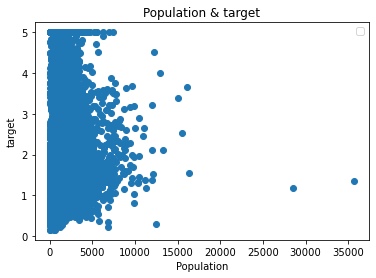

In [25]:
#i번째 feature와 타겟 값 사이의 관계 시각화
i=4
plt.title(california.feature_names[i]+' & ' + 'target')
plt.xlabel(california.feature_names[i])
plt.ylabel('target')
plt.scatter(DF[california.feature_names[i]],Y)
plt.legend()
plt.show()